In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import sklearn
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'D:\TEST Techcombank\data_test.csv')

new_header = data.iloc[0]
data = data[1:]
data.columns = new_header
data.index = data['ID']
data.drop(columns = 'ID',inplace=True)
data = data.loc[:,data.columns.notnull()]
data = data.rename (columns={'default payment next month':'default','North Carolina':'State'})

#### 1. Data explore
***

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,State
ID,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,North Dakota
2,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,Texas
3,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,Illinois
4,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,Florida
5,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,Alaska


In [4]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default', 'State'],
      dtype='object', name=0)

In [5]:
data[['LIMIT_BAL', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
     ]] = data[['LIMIT_BAL', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
     ]].apply(pd.to_numeric)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   BILL_AMT1  30000 non-null  int64 
 6   BILL_AMT2  30000 non-null  int64 
 7   BILL_AMT3  30000 non-null  int64 
 8   BILL_AMT4  30000 non-null  int64 
 9   BILL_AMT5  30000 non-null  int64 
 10  BILL_AMT6  30000 non-null  int64 
 11  PAY_AMT1   30000 non-null  int64 
 12  PAY_AMT2   30000 non-null  int64 
 13  PAY_AMT3   30000 non-null  int64 
 14  PAY_AMT4   30000 non-null  int64 
 15  PAY_AMT5   30000 non-null  int64 
 16  PAY_AMT6   30000 non-null  int64 
 17  default    30000 non-null  object
 18  State      30000 non-null  object
dtypes: int64(14), object(5)
memory usage: 4.6+ MB


In [7]:
data['State'].describe()

count        30000
unique          50
top       Kentucky
freq           654
Name: State, dtype: object

In [8]:
# Biểu đồ histogram
def _plot_hist_subplot(x, fieldname, bins = 10, use_kde = True):
  x = x.dropna()
  xlabel = '{} bins tickers'.format(fieldname)
  ylabel = 'Count obs in {} each bin'.format(fieldname)
  title = 'histogram plot of {} with {} bins'.format(fieldname, bins)
  ax = sns.distplot(x, bins = bins, kde = use_kde)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  return ax

# Biểu đồ barchart
def _plot_barchart_subplot(x, fieldname):
  xlabel = 'Group of {}'.format(fieldname)
  ylabel = 'Count obs in {} each bin'.format(fieldname)
  title = 'Barchart plot of {}'.format(fieldname)
  x = x.fillna('Missing')
  df_summary = x.value_counts(dropna = False)
  y_values = df_summary.values
  x_index = df_summary.index
  ax = sns.barplot(x = x_index, y = y_values, order = x_index)
  # Tạo vòng for lấy tọa độ đỉnh trên cùng của biểu đồ và thêm label thông qua annotate.
  labels = list(set(x))
  for label, p in zip(y_values, ax.patches):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  return ax

C:\Users\namph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\namph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\namph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

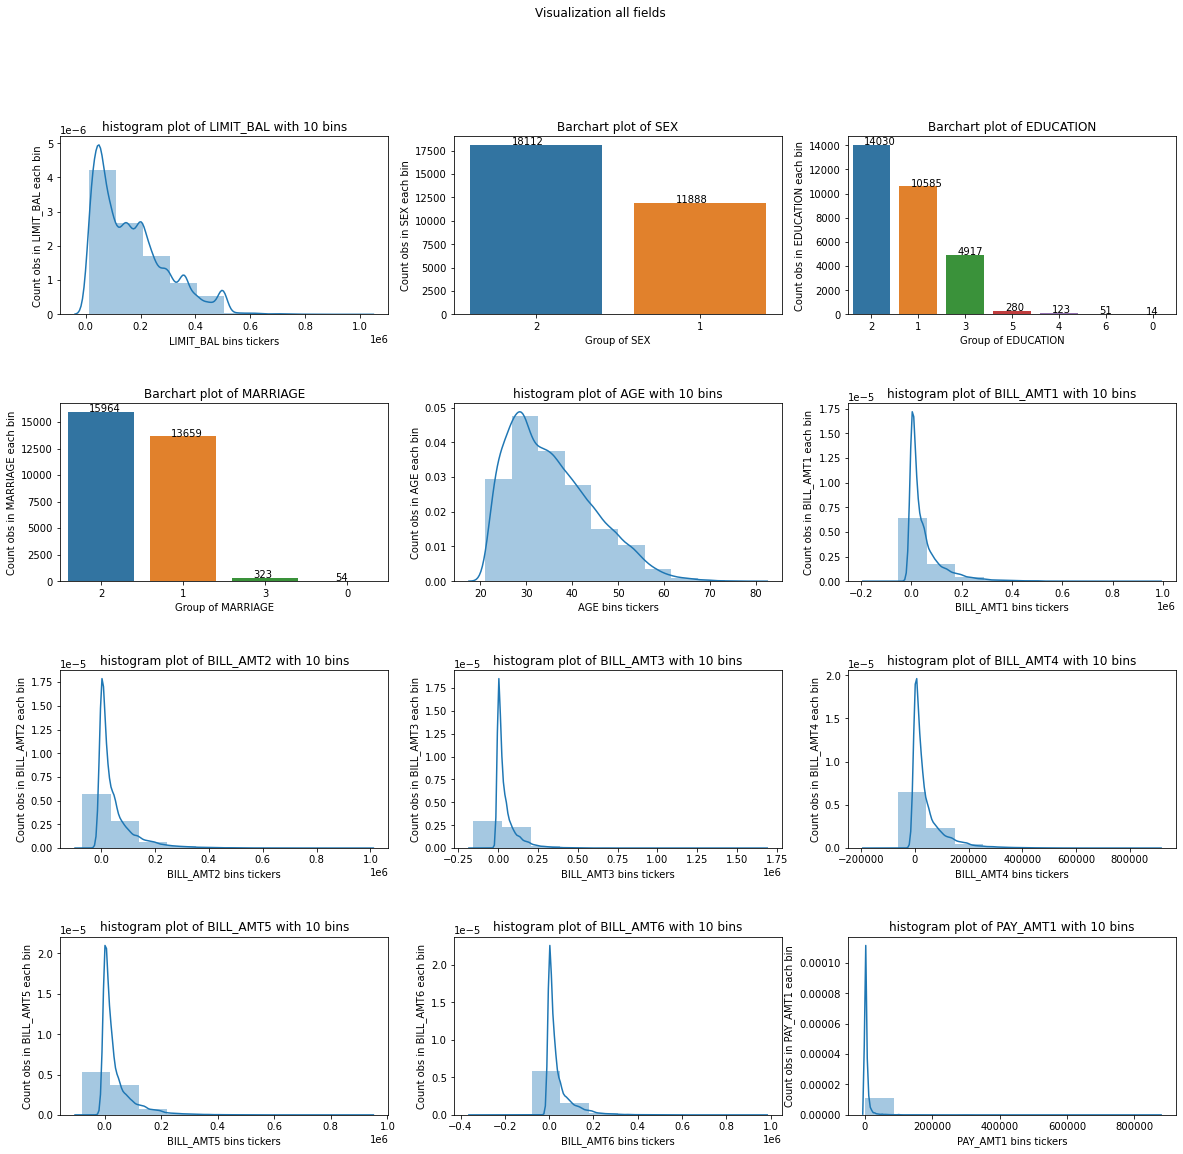

In [9]:
# Khởi tạo figure cho đồ thị (Kích thước W*H = 16x12) và cách nhau là 0.2 giữa các đồ thị
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
# Tạo vòng for check định dạng của biến và visualize
for i, (fieldname, dtype) in enumerate(zip(data.columns, data.dtypes.values)):
  if i <= 11:
    ax_i = fig.add_subplot(4, 3, i+1)
    if dtype in ['float64', 'int64']:
      ax_i = _plot_hist_subplot(data[fieldname], fieldname=fieldname)
    else:
      ax_i = _plot_barchart_subplot(data[fieldname], fieldname=fieldname)
      
fig.suptitle('Visualization all fields')
plt.show()

In [10]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default', 'State'],
      dtype='object', name=0)

<AxesSubplot:xlabel='SEX'>

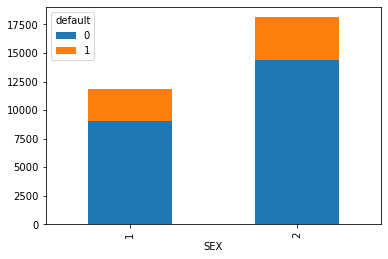

In [11]:
gender = pd.crosstab(data.SEX, data.default)
gender.plot(kind='bar', stacked=True)

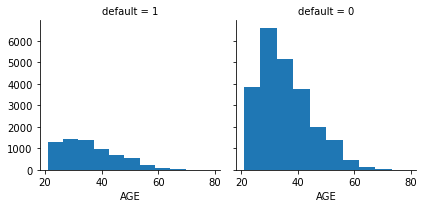

In [12]:
g = sns.FacetGrid(data, col='default')
g.map(plt.hist, 'AGE')

In [13]:
def correl(Col1, Col2):
    output = data.groupby([Col1, Col2]).size().unstack()
    output['Percent'] = (output[output.columns[1]]/(output[output.columns[1]]+output[output.columns[0]]))
    return output

In [14]:
correl('SEX','default')

default,0,1,Percent
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


In [15]:
correl('EDUCATION','default')

default,0,1,Percent
EDUCATION,,,
0,14.0,NaN,NaN
1,8549.0,2036.0,0.192348
2,10700.0,3330.0,0.237349
3,3680.0,1237.0,0.251576
4,116.0,7.0,0.056911
5,262.0,18.0,0.064286
6,43.0,8.0,0.156863


In [16]:
correl('MARRIAGE','default')

default,0,1,Percent
MARRIAGE,,,
0,49,5,0.092593
1,10453,3206,0.234717
2,12623,3341,0.209283
3,239,84,0.260062


#### 2. Data cleaning
***

In [17]:
#Nhóm các nhóm other và unknown trong biến EDUCATION và MARIAGE
 
data.loc[(data.EDUCATION =='5')|(data.EDUCATION == '6')|(data.EDUCATION == '0'), 
         'EDUCATION'] = '4'
data.loc[data.MARRIAGE == '0', 'MARRIAGE'] = '3'


In [18]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [19]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [20]:
data2 = data.apply(pd.to_numeric,errors='ignore')

In [82]:
data2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default', 'State'],
      dtype='object', name=0)

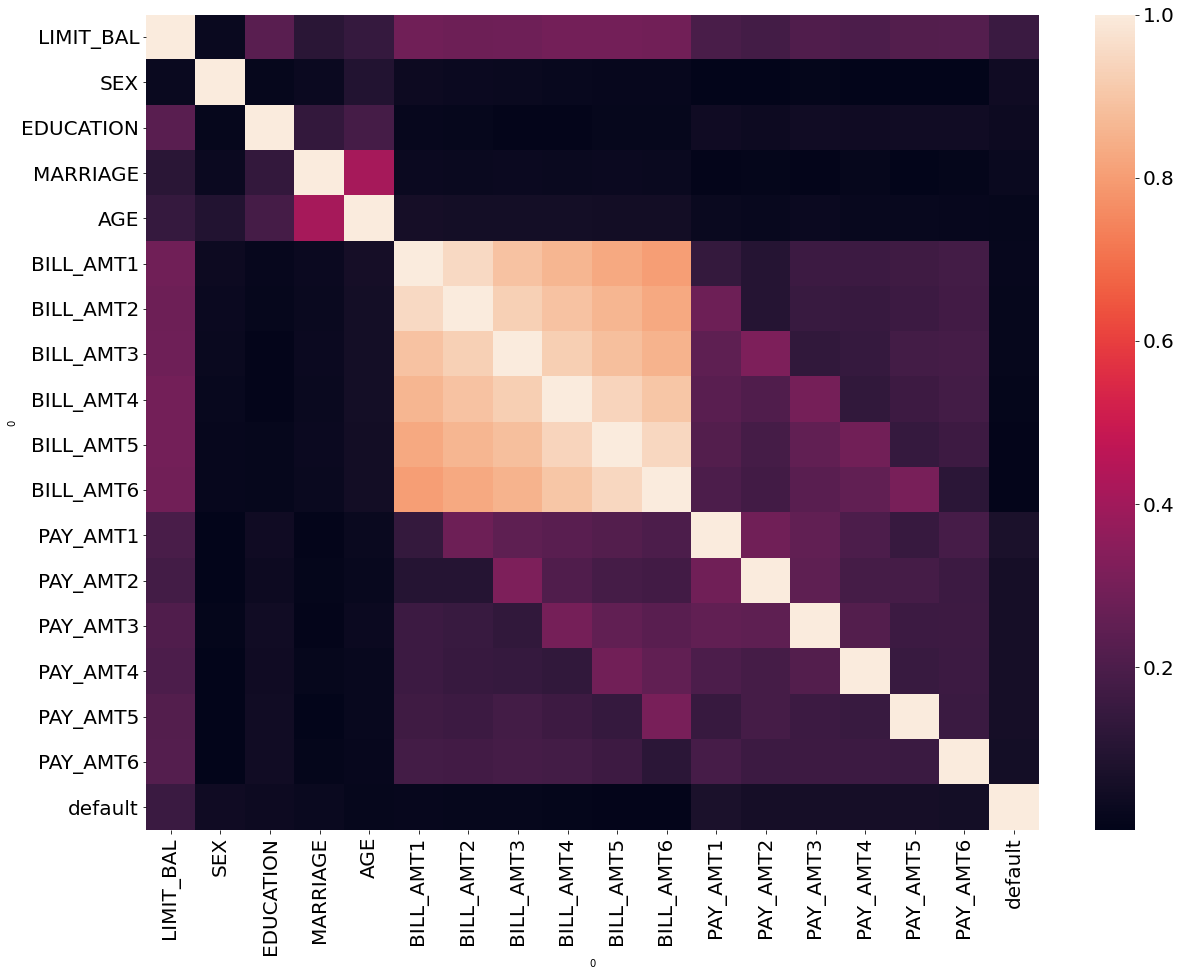

In [85]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
plt.subplots(figsize=(20,15))

corrMatrix = data2.corr()
corrMatrix = abs(corrMatrix)
sns.heatmap(corrMatrix)
plt.savefig("Feature Correlation HeatMap feat1 v2",dpi=300)

In [21]:
data2.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,,,,,,,,,,,,,,,,,,
LIMIT_BAL,1.000000,0.024755,-0.231088,-0.111012,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.016597,0.011980,0.006714,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
MARRIAGE,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,-0.027832,-0.025294,-0.029082,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.144713,-0.090874,0.182434,-0.412001,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
BILL_AMT1,0.285430,-0.033642,0.016597,-0.027832,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644
BILL_AMT2,0.278314,-0.031183,0.011980,-0.025294,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,-0.014193
BILL_AMT3,0.283236,-0.024563,0.006714,-0.029082,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326,-0.014076
BILL_AMT4,0.293988,-0.021880,-0.006131,-0.027274,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637,-0.010156


In [22]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default', 'State'],
      dtype='object', name=0)

#### 3. Feature engineering
***

In [23]:
pd.cut(data.AGE, 6).value_counts()

(20.942, 30.667]    11013
(30.667, 40.333]    10713
(40.333, 50.0]       6005
(50.0, 59.667]       1930
(59.667, 69.333]      314
(69.333, 79.0]         25
Name: AGE, dtype: int64

In [24]:
# Chia bins cho các nhóm độ tuổi
data['Age_bin'] = pd.cut(data.AGE, 6, labels = [1,2,3,4,5,6])
data['Age_bin'] = pd.to_numeric(data.Age_bin)
data.loc[(data['Age_bin'] == 6), 'Age_bin'] = 5

In [91]:
data['Age_bin_2'] = pd.cut(data.AGE, 6)
data['Age_bin_2'] = pd.to_numeric(data.Age_bin)
#data.loc[(data['Age_bin_2'] == 6), 'Age_bin'] = 5

<AxesSubplot:>

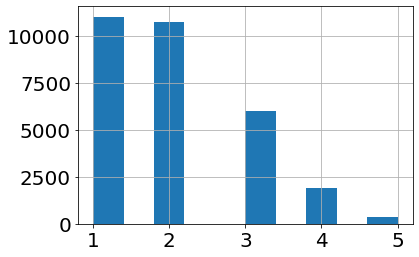

In [92]:
data.Age_bin_2.hist()

In [25]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default', 'State', 'Age_bin'],
      dtype='object', name=0)

In [26]:
# Lấy feature khách chậm trả
data['Late_pay_5'] = 1
data['Late_pay_4'] = 1
data['Late_pay_3'] = 1
data['Late_pay_2'] = 1
data.loc[((data.PAY_AMT5 + data.PAY_AMT6) -(data.BILL_AMT5 + data.BILL_AMT4)) >= 0, 'Late_pay_5' ] = 0
data.loc[((data.PAY_AMT4 + data.PAY_AMT5) -(data.BILL_AMT4 + data.BILL_AMT3)) >= 0, 'Late_pay_4' ] = 0
data.loc[((data.PAY_AMT3 + data.PAY_AMT4) -(data.BILL_AMT3 + data.BILL_AMT2)) >= 0, 'Late_pay_3' ] = 0
data.loc[((data.PAY_AMT2 + data.PAY_AMT3) -(data.BILL_AMT2 + data.BILL_AMT1)) >= 0, 'Late_pay_2' ] = 0

In [27]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,State,Age_bin,Late_pay_5,Late_pay_4,Late_pay_3,Late_pay_2
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,3913,3102,689,0,0,...,0,0,0,1,North Dakota,1,0,1,1,1
2,120000,2,2,2,26,2682,1725,2682,3272,3455,...,1000,0,2000,1,Texas,1,1,1,1,1
3,90000,2,2,2,34,29239,14027,13559,14331,14948,...,1000,1000,5000,0,Illinois,2,1,1,1,1
4,50000,2,2,1,37,46990,48233,49291,28314,28959,...,1100,1069,1000,0,Florida,2,1,1,1,1
5,50000,1,2,1,57,8617,5670,35835,20940,19146,...,9000,689,679,0,Alaska,4,1,1,1,0


In [28]:
#Số lượng khách chậm trả từng kỳ
print(data[data.Late_pay_5 == 1].default.count())
print(data[data.Late_pay_4 == 1].default.count())
print(data[data.Late_pay_3 == 1].default.count())
print(data[data.Late_pay_2 == 1].default.count())

23271
23674
23905
23984


In [29]:
data['remain_6'] = (data.LIMIT_BAL - data.BILL_AMT6) / data.LIMIT_BAL
data['remain_5'] = (data.LIMIT_BAL - data.BILL_AMT5) / data.LIMIT_BAL
data['remain_4'] = (data.LIMIT_BAL - data.BILL_AMT4) / data.LIMIT_BAL
data['remain_3'] = (data.LIMIT_BAL - data.BILL_AMT3) / data.LIMIT_BAL
data['remain_2'] = (data.LIMIT_BAL - data.BILL_AMT2) / data.LIMIT_BAL
data['remain_1'] = (data.LIMIT_BAL - data.BILL_AMT1) / data.LIMIT_BAL

In [30]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default', 'State', 'Age_bin', 'Late_pay_5', 'Late_pay_4', 'Late_pay_3',
       'Late_pay_2', 'remain_6', 'remain_5', 'remain_4', 'remain_3',
       'remain_2', 'remain_1'],
      dtype='object', name=0)

In [31]:
data = data.apply(pd.to_numeric,errors='ignore')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LIMIT_BAL   30000 non-null  int64  
 1   SEX         30000 non-null  int64  
 2   EDUCATION   30000 non-null  int64  
 3   MARRIAGE    30000 non-null  int64  
 4   AGE         30000 non-null  int64  
 5   BILL_AMT1   30000 non-null  int64  
 6   BILL_AMT2   30000 non-null  int64  
 7   BILL_AMT3   30000 non-null  int64  
 8   BILL_AMT4   30000 non-null  int64  
 9   BILL_AMT5   30000 non-null  int64  
 10  BILL_AMT6   30000 non-null  int64  
 11  PAY_AMT1    30000 non-null  int64  
 12  PAY_AMT2    30000 non-null  int64  
 13  PAY_AMT3    30000 non-null  int64  
 14  PAY_AMT4    30000 non-null  int64  
 15  PAY_AMT5    30000 non-null  int64  
 16  PAY_AMT6    30000 non-null  int64  
 17  default     30000 non-null  int64  
 18  State       30000 non-null  object 
 19  Age_bin     30000 non-null  in

#### 4. Sampling and apply algorithm
***

In [33]:
from sklearn.utils import resample
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [78]:
#các thuật toán sử dụng
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_predict

In [34]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
        , 'Age_bin', 'Late_pay_5', 'Late_pay_4', 'Late_pay_3',
       'Late_pay_2', 'remain_6', 'remain_5', 'remain_4', 'remain_3',
       'remain_2', 'remain_1']

In [35]:
y = data['default'].copy()
X = data[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
data_train = X_train.join(y_train)

In [45]:
from sklearn.utils import resample

In [70]:
clf_list = [RandomForestClassifier(n_estimators = 100, class_weight = "balanced"), 
            GradientBoostingClassifier()
           ]

#### 4a. Random forest

In [66]:
param_grid = {'n_estimators': [200, 400, 600, 1000], 
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]}


acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)


In [41]:
%time grid_forest = grid_forest.fit(X_train, y_train)

Wall time: 6min 15s


In [42]:
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_normal = grid_forest.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=400, n_jobs=-1)
0.2800462937258278


In [67]:
forest_normal = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [75]:
%time forest_normal.fit(X_train, y_train)
predictions = forest_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

Wall time: 9.01 s
-------------
f1 score: 0.262
Accuracy: 0.784
-------------
True Positives: 231
False Positive: 217
True Negative: 4470
False Negative: 1082
Precision: 0.52
Recall: 0.18


#### 4b. Gradient Boost

In [68]:
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_train, y_train)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_normal = grid_gbc.best_estimator_

Wall time: 11min 46s
GradientBoostingClassifier(learning_rate=1.0, n_estimators=300)
0.3320956662333408


In [69]:
gbc_normal = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [76]:
%time gbc_normal.fit(X_train, y_train)
predictions = gbc_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")

TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

C:\Users\namph\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:304: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  % self.n_iter_no_change)


Wall time: 22.4 s
-------------
f1 score: 0.313
Accuracy: 0.781
-------------
True Positives: 299
False Positive: 298
True Negative: 4389
False Negative: 1014
Precision: 0.5
Recall: 0.23
